In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

sns.set_context("talk")
sns.set_style("white")

%matplotlib inline

## Load the Data

In [5]:
output_dir = "./output/"
df = pd.read_csv("./data/1-cat.csv")
df.head()

,year,count,count_domain,category
0,2020,2234,199136,Materials Science
1,2019,1213,188350,Materials Science
2,2018,464,165938,Materials Science
3,2017,235,162121,Materials Science
4,2016,119,147722,Materials Science


# Calculate relevant stats on the dataframe

In [6]:
def growth(x):
    return  (x[-1]-x[0]) / x[0]
    
def cagr(x):
    return  (x[-1] / x[0]) ** (1 / (len(x) - 1)) - 1

        
def calculate_stats(group):
    group['yoy_1'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(2,2).apply(growth, raw=True)
    group['yoy_2'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(3,2).apply(growth, raw=True)
    group['yoy_5'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(6,2).apply(growth, raw=True)
    group['cagr_1'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(2,2).apply(cagr, raw=True)*100
    group['cagr_2'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(3,2).apply(cagr, raw=True)*100
    group['cagr_5'] = group.sort_values(by=['year'], ascending=True)['count'].rolling(6,2).apply(cagr, raw=True)*100
    return group

df['normalized'] = 100*df['count']/df['count_domain']
df = df.groupby('category').apply(calculate_stats)

# Show Latest Stats

cagr - Compound Annual Growth Rate (%)

yoy_n - current count / count n years ago

In [8]:
df[df.year==2020]

,year,count,count_domain,category,normalized,yoy_1,yoy_2,yoy_5,cagr_1,cagr_2,cagr_5
0,2020,2234,199136,Materials Science,1.121846,0.841715,3.814655,19.495413,84.171476,119.423225,82.949545
21,2020,4211,272424,Chemistry,1.545752,0.433776,1.194372,2.863303,43.377596,48.134131,31.036338
42,2020,2678,165951,Physics,1.613729,0.796110,2.604307,16.618421,79.610999,89.850122,77.497973
63,2020,15110,107306,Computer Science,14.081226,0.632984,1.819030,6.915139,63.298390,67.899668,51.248720
84,2020,952,92679,Biochemistry & Molecular Biology,1.027201,0.257596,1.929231,5.389262,25.759577,71.149957,44.907257
105,2020,15883,347626,Engineering,4.568991,0.745960,2.438623,13.478578,74.596021,85.435247,70.665282


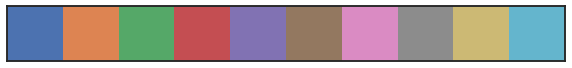

In [10]:
# Set plot time range
years = (2000, 2020)

# Set some marker defaults
marker_size = 150
marker_alpha = 0.6

# Set figure save parameters
fig_dpi = 1000

# Define plot sizes
golden = (4*1.618,4)

# Define palette options
colors = ["blue","orange","green"]*3
sns.set_palette("deep")
sns.palplot(sns.color_palette())

In [11]:
colors

['blue',
 'orange',
 'green',
 'blue',
 'orange',
 'green',
 'blue',
 'orange',
 'green']

# Visualize with MatplotLib

## All Together

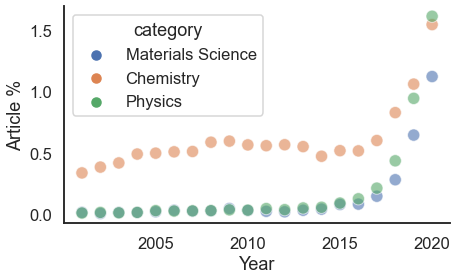

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)

category_list = ["Materials Science", "Chemistry", "Physics"]

df = df[df['category'].isin(category_list)]
data = df[df['year']>years[0]]
sns.scatterplot(x="year", y="normalized",
                hue="category", data=data, 
                s=marker_size, alpha=marker_alpha,
                ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article %")
sns.despine()
plt.tight_layout()

fig.savefig(os.path.join(output_dir,'1-all-scatter-norm.png'),
            dpi=fig_dpi)

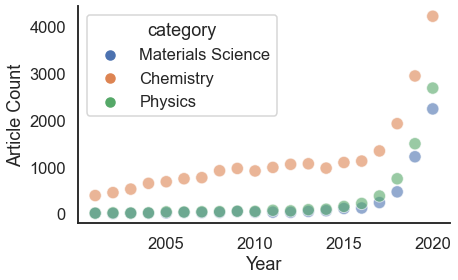

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.scatterplot(x="year", y="count",
                hue="category", data=data, 
                s=marker_size, alpha=marker_alpha,
                ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article Count")
sns.despine()
plt.tight_layout()

fig.savefig(os.path.join(output_dir,'1-all-scatter.png'),
            dpi=fig_dpi)

In [15]:
data

,year,count,count_domain,category,normalized,yoy_1,yoy_2,yoy_5,cagr_1,cagr_2,cagr_5
0,2020,2234,199136,Materials Science,1.121846,0.841715,3.814655,19.495413,84.171476,119.423225,82.949545
1,2019,1213,188350,Materials Science,0.644014,1.614224,4.161702,18.564516,161.422414,127.193797,81.256597
2,2018,464,165938,Materials Science,0.279623,0.974468,2.899160,9.086957,97.446809,97.462899,58.763999
3,2017,235,162121,Materials Science,0.144953,0.974790,1.155963,7.703704,97.478992,46.831989,54.149038
4,2016,119,147722,Materials Science,0.080557,0.091743,0.919355,2.966667,9.174312,38.540782,31.730136
5,2015,109,140425,Materials Science,0.077622,0.758065,1.369565,2.406250,75.806452,53.933921,27.777770
6,2014,62,156657,Materials Science,0.039577,0.347826,1.296296,0.377778,34.782609,51.535352,6.619302
7,2013,46,150986,Materials Science,0.030466,0.703704,0.533333,0.769231,70.370370,23.827837,12.087426
8,2012,27,149895,Materials Science,0.018013,-0.100000,-0.156250,0.173913,-10.000000,-8.144135,3.258827
9,2011,30,137780,Materials Science,0.021774,-0.062500,-0.333333,0.153846,-6.250000,-18.350342,2.903366


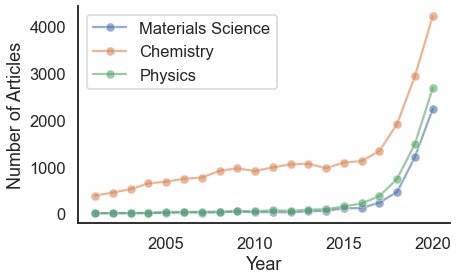

In [16]:
add_events = False

fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.lineplot(x="year", 
             y="count",
             hue="category", 
             data=data,
             marker='o',
             alpha=marker_alpha,
             ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Articles")
sns.despine()
plt.tight_layout() 
plt.legend(title='', loc='upper left', labels=["Materials Science", "Chemistry","Physics"])


if add_events:
    plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
    plt.text(2011.7, 0.75, 'MGI Whitepaper')
    plt.legend(title='', loc='upper left', labels=["Materials Science", "Chemistry","Physics"])
    plt.axvline(x=2015.83, alpha=0.5) # June 24, 2011, Holdren OSP memo 
    plt.text(2012.5, 0.9, 'MDF Funded')

fig.savefig(os.path.join(output_dir,'fig-name.png'),dpi=fig_dpi)

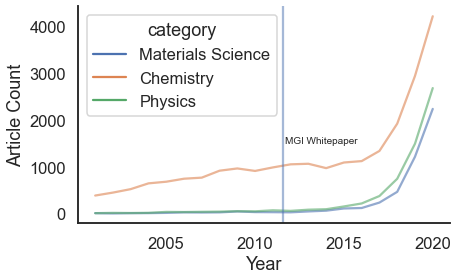

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(golden)
data = df[df['year']>years[0]]
sns.lineplot(x="year", y="count",
                  hue="category", data=data,
                  alpha=marker_alpha,
                 ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Article Count")
sns.despine()
plt.tight_layout()

plt.axvline(x=2011.58, alpha=0.5) # June 24, 2011, Holdren OSP memo 
plt.text(2011.7, 1500, 'MGI Whitepaper')

fig.savefig(os.path.join(output_dir,'1-all-line.png'),dpi=fig_dpi)

## Grid

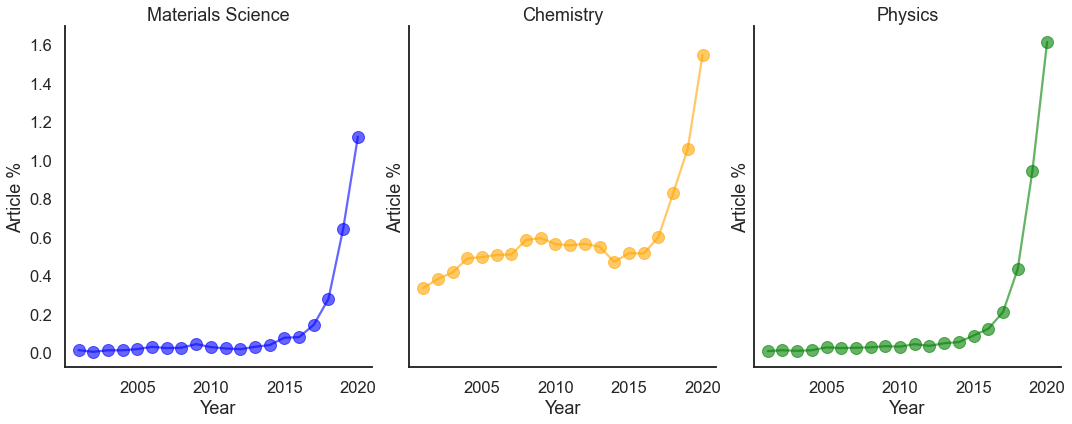

In [18]:
# Initialize a grid of plots with an Axes for each walk
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['normalized'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article %")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line-norm.png'),dpi=fig_dpi)

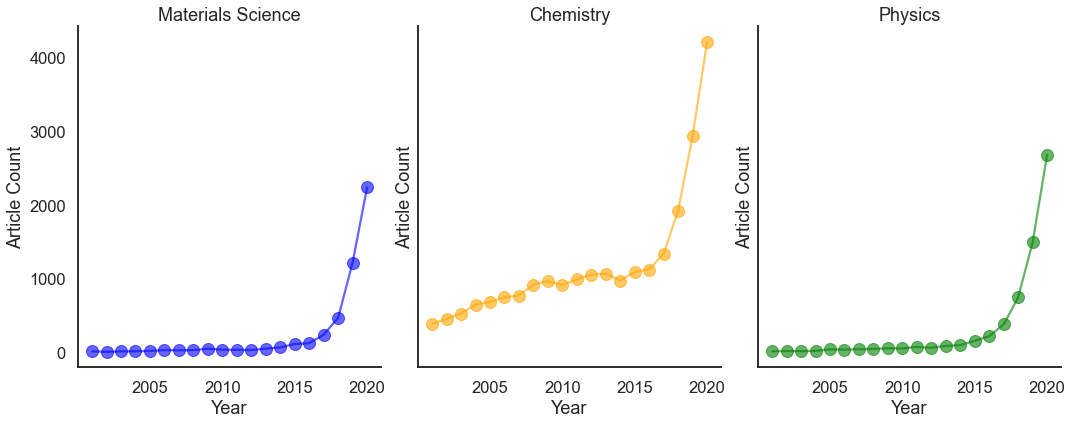

In [19]:
# Initialize a grid of plots with an Axes for each walk
categories = df['category'].unique()
f, axs = plt.subplots(1,len(categories), sharey=True, figsize=(15,6))

for i, cat in enumerate(categories):
    data = df[(df['category']==cat) & (df['year']>years[0])]
    axs[i].plot(data['year'], data['count'], 
                marker="o", markersize=12, color=colors[i], 
                alpha=marker_alpha) #c=colors[i], alpha=marker_alpha, s=marker_size)
    axs[i].set_title(cat)
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Article Count")
    sns.despine()
    plt.tight_layout()
f.savefig(os.path.join(output_dir,'1-grid-line.png'),dpi=fig_dpi)

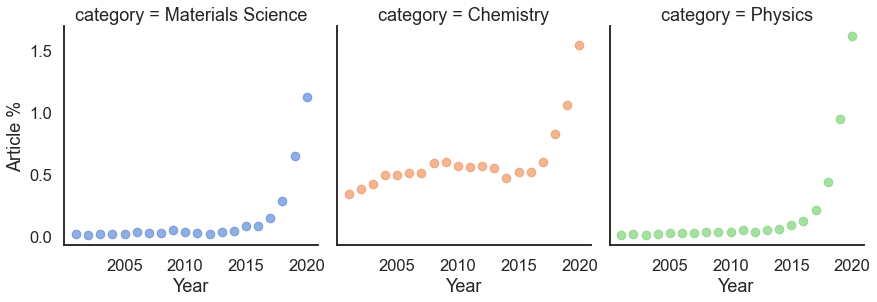

In [20]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="normalized", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article %")
sns_fig.savefig(os.path.join(output_dir,"1-grid-norm.png"), dpi=fig_dpi)

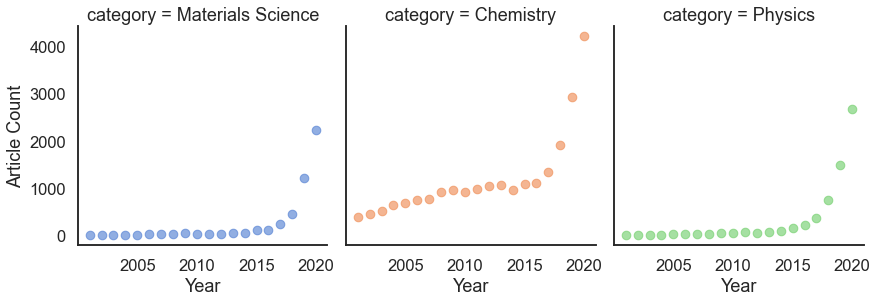

In [21]:
data = df[df['year']>years[0]]
sns_fig = sns.lmplot(x="year", y="count", col="category", 
           hue="category", data=data,
           col_wrap=3, ci=None, palette="muted", height=4, fit_reg=False,
           scatter_kws={"s": marker_size/2, "alpha": marker_alpha})
sns_fig.set_axis_labels("Year","Article Count")
sns_fig.savefig(os.path.join(output_dir,"1-grid.png"), dpi=fig_dpi)

# Individual

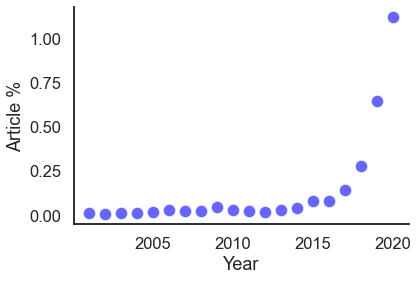

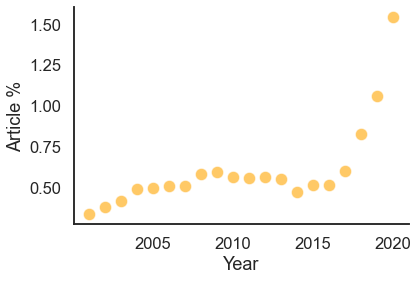

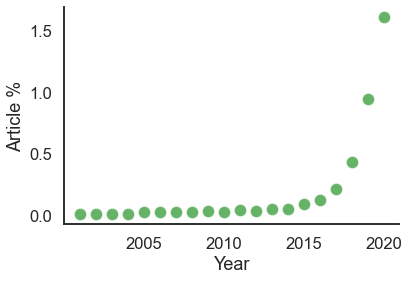

In [22]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="normalized",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article %")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}-norm.png'.format(category)),dpi=fig_dpi)

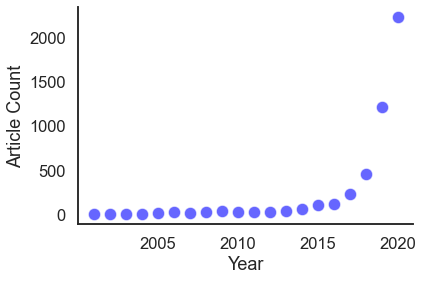

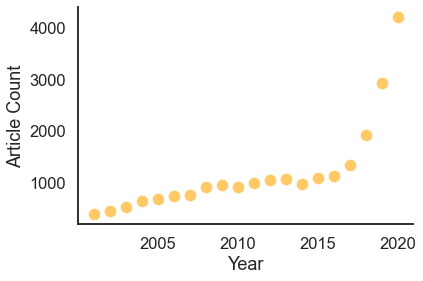

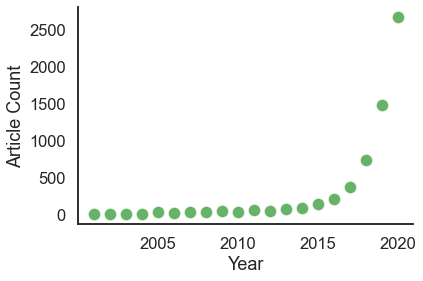

In [23]:
for i,category in enumerate(df['category'].unique()):
    fig = plt.figure()

    data = df[(df['category']==category) & (df['year']>years[0])]
    ax = sns.scatterplot(x="year", y="count",
                        data=data, s=marker_size, 
                        alpha=marker_alpha, color=colors[i])
    ax.set_xlabel("Year")
    ax.set_ylabel("Article Count")
    sns.despine()
    fig.savefig(os.path.join(output_dir,'1-{}.png'.format(category)),dpi=fig_dpi)

# Visualize with Altair

## All Together

In [ ]:
!pip install altair

In [24]:
data = df[df['category']=='Chemistry']

charts = []

for i, category in enumerate(df['category'].unique()):
    data = df[df['category']==category]
    chart = alt.Chart(data[['year','count']]).mark_circle(size=marker_size, color=colors[i]).encode(
        x=alt.X('year', scale=alt.Scale(domain=(2000, 2019))),
        y=alt.Y('count')).properties(
        width=500,
        height=350,
        title=category
    )
    charts.append(chart)

NameError: name 'alt' is not defined

## All Together

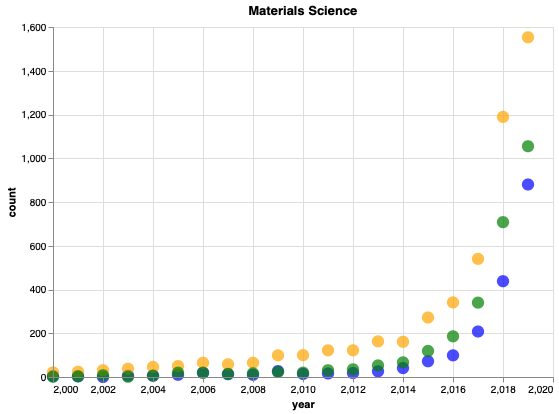

In [15]:
charts[0] + charts[1] + charts[2]

## Grid

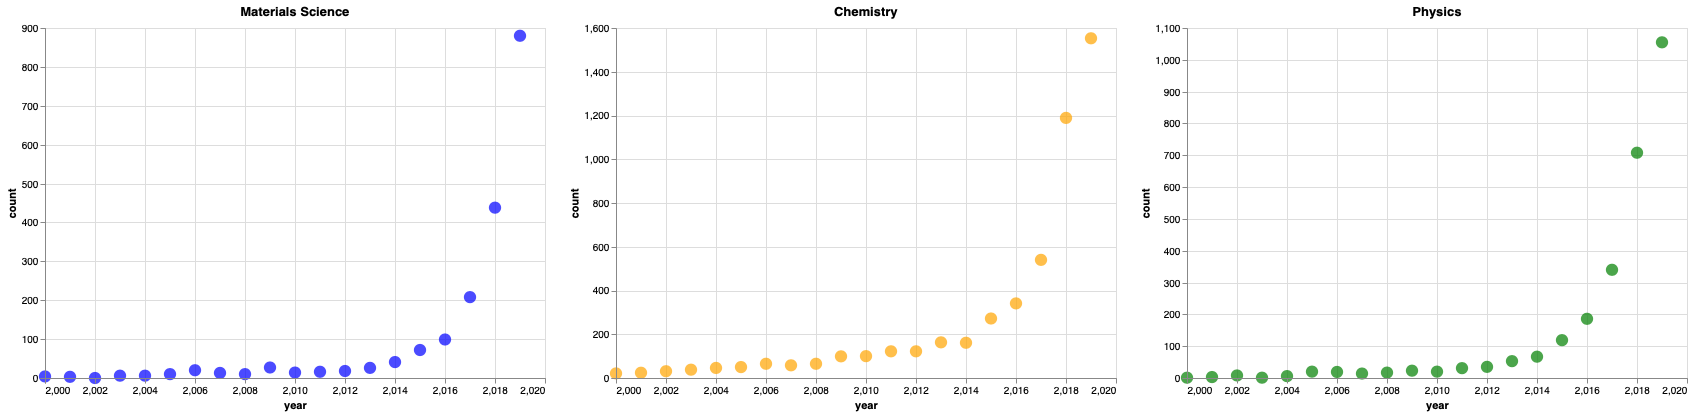

In [16]:
charts[0] | charts[1] | charts[2]

## Individual

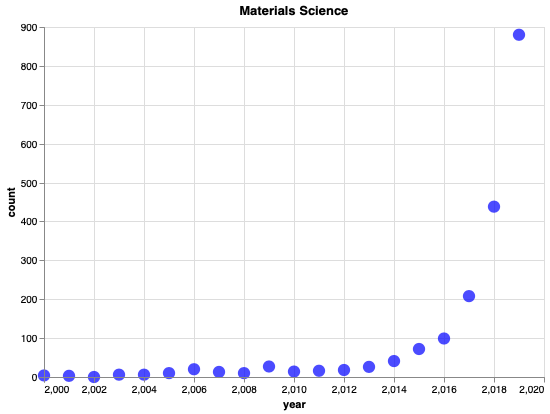

In [17]:
charts[0]

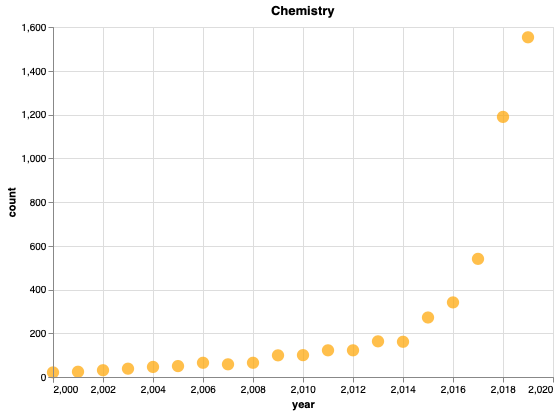

In [18]:
charts[1]

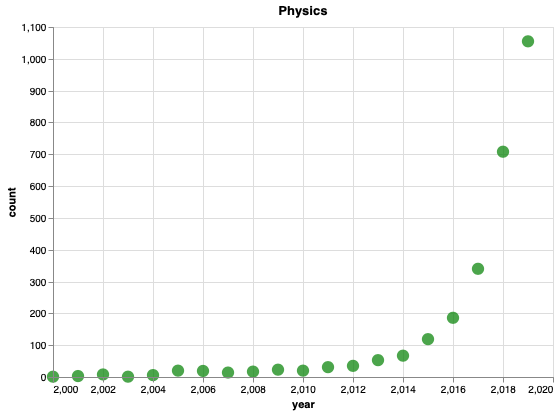

In [19]:
charts[2]